In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve, roc_auc_score


In [2]:
df = pd.read_csv('../data/cleaned/time_aware_churn_dataset.csv')

X = df.drop(columns=['Customer ID', 'Churn'])
y = df['Churn']


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

rf_model = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train, y_train)

y_proba = rf_model.predict_proba(X_test)[:, 1]


In [4]:
importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances


PurchaseVelocity    0.225719
Recency             0.221655
Monetary            0.211320
AvgOrderValue       0.142990
Tenure              0.119893
Frequency           0.078424
dtype: float64

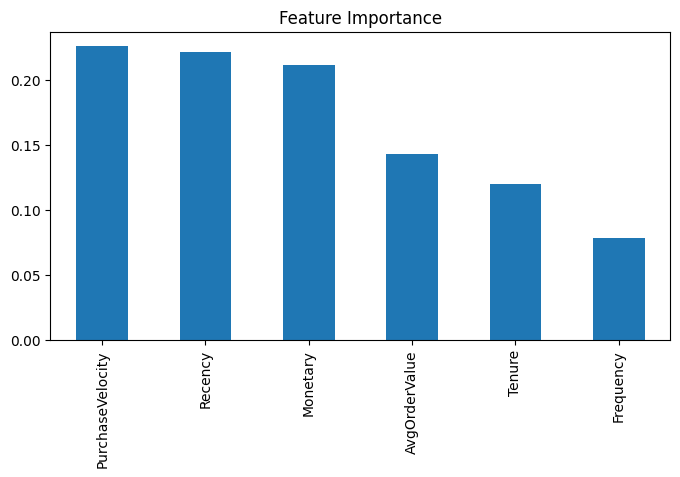

In [5]:
importances.plot(kind='bar', figsize=(8,4))
plt.title("Feature Importance")
plt.show()


In [6]:
# Add predictions back to test set
X_test_copy = X_test.copy()
X_test_copy['Churn_Prob'] = y_proba
X_test_copy['Actual_Churn'] = y_test.values

# Define high risk threshold (default 0.5)
high_risk = X_test_copy[X_test_copy['Churn_Prob'] > 0.5]

# Revenue at risk (sum of monetary for high risk customers)
revenue_at_risk = high_risk['Monetary'].sum()

revenue_at_risk


np.float64(698179.28)

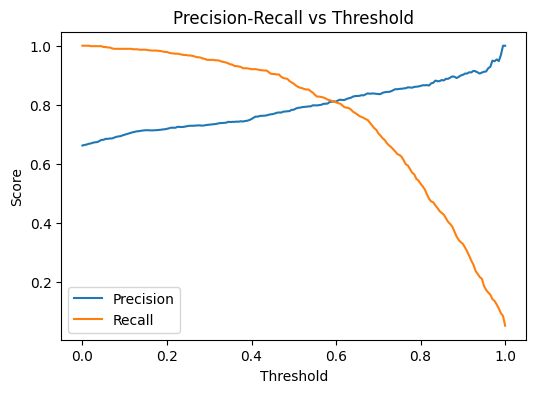

In [7]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.show()
